In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('SMSSpamCollection',sep='\t',names=['label','text'])

In [3]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.shape

(5572, 2)

In [5]:
import nltk

In [6]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [99]:
from nltk.tokenize import word_tokenize

In [100]:
from nltk.corpus import stopwords
swords=stopwords.words('english')
swords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [101]:
def clean_text(sent):
    tokens=word_tokenize(sent)
    clean=[word for word in tokens
          if word.isdigit() or word.isalpha()]
    clean=[ps.stem(word) for word in clean 
          if word not in swords]
    return clean

In [102]:
# Data preprocessing using TF-IDF vectorization
# In this we are creating each column for different word
from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
tfidf=TfidfVectorizer(analyzer=clean_text)

In [104]:
x=df['text']
y=df['label']

In [105]:
x_new=tfidf.fit_transform(x)

In [106]:
x.shape

(5572,)

In [107]:
x_new.shape

(5572, 6513)

In [108]:
tfidf.get_feature_names()

['0',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '050703',
 '0578',
 '06',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07973788240',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '0870',
 '08701213186',
 '08701237397',
 '08701417012',
 '087016248',
 '08701752560',
 '087018728737',
 '0870241182716',
 '08702490080',
 '08702840625',
 '08704439680

In [109]:
y.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [110]:
#cross validation
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(
    x_new,y,random_state=0,test_size=0.25)


In [82]:
print(x_train.shape)

(4179, 6513)


In [83]:
x_test.shape

(1393, 6513)

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
nb=GaussianNB()

In [86]:
nb.fit(x_train.toarray(),y_train)

GaussianNB()

In [87]:
y_pred=nb.predict(x_test.toarray())

In [88]:
y_test.value_counts()

ham     1208
spam     185
Name: label, dtype: int64

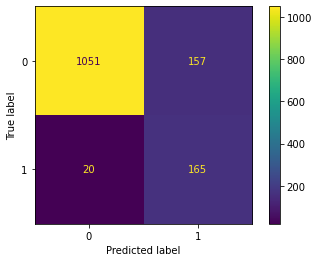

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
print()

In [90]:
from sklearn.metrics import accuracy_score,classification_report

In [91]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393



In [92]:
accuracy_score(y_test,y_pred)

0.8729361091170137

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [111]:
# Assuming 'temp' is a list of strings
temp = ['My name is Omkar']
temp_tfidf = tfidf.transform(temp)
rf.predict(temp_tfidf)[0]



'ham'

In [95]:
y_pred=rf.predict(x_test)

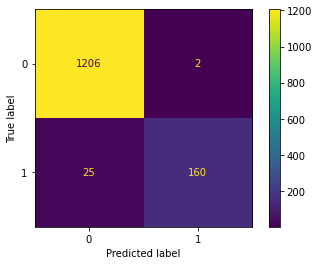

In [96]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

In [97]:
accuracy_score(y_test,y_pred)

0.9806173725771715

In [41]:
from sklearn.linear_model import LogisticRegression
log =LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
accuracy_score(y_test,y_pred)

0.9641062455132807

In [42]:
# Hyper parameter tuning->what ideal parameter should be passed
from sklearn.model_selection import GridSearchCV

In [43]:
params={
    'criterion':['gini','entropy'],
    'max_features':['sqrt','log2'],
    'random_state':[0,1,2,3,4],
    'class_weight':['balanced','balanced_subsample']
}

In [44]:
grid=GridSearchCV(rf,param_grid=params,cv=5,scoring='accuracy')

In [45]:
#this step requires more time as this algorithm is more complex(10 min)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [0, 1, 2, 3, 4]},
             scoring='accuracy')

In [46]:
rf=grid.best_estimator_

In [47]:
y_pred=rf.predict(x_test)

In [48]:
accuracy_score(y_test,y_pred)

0.9770279971284996